<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Vinicio Borja  <br>
Fecha: 07/27/2022

# Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
from sklearn.preprocessing import LabelEncoder# 
from sklearn.preprocessing import MinMaxScaler # 
import numpy as np# 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

## Cargar el Dataset

In [2]:
#Código para cargar el Dataset
df = pd.read_csv('predictive_maintenance.csv')
df.head()#Muestra las primeras 5 filas del DataFrame

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df['Failure Type'].unique() # Muestra los tipos de fallos

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

## Descripción de la fuente del Dataset

UID: identificador único que va de 1 a 10000<br>
productID: que consiste en una letra L, M o H para bajo (50% de todos los productos), medio (30%) y alto (20%) como variantes de calidad del producto y un número de serie específico de la variante<br>
temperatura del aire [K]: generada mediante un proceso de caminata aleatoria normalizado posteriormente a una desviación estándar de 2 K alrededor de 300 K<br>
temperatura de proceso [K]: generada mediante un proceso de caminata aleatoria normalizado a una desviación estándar de 1 K, añadida a la temperatura del aire más 10 K.<br>
velocidad de rotación [rpm]: calculada a partir de una potencia de 2860 W, superpuesta con un ruido normalmente distribuido
par [Nm]: los valores de par se distribuyen normalmente alrededor de 40 Nm con un Ïƒ = 10 Nm y sin valores negativos.<br>
desgaste de la herramienta [min]: Las variantes de calidad H/M/L añaden 5/3/2 minutos de desgaste de la herramienta a la herramienta utilizada en el proceso. y una
etiqueta de "error de la máquina" que indica si la máquina ha fallado en este punto de datos en particular para cualquiera de los siguientes modos de falla son verdaderos.

## Explique el problema a resolver. 
Se requiere predecir el error de la maquina binaria en función a ciertas caracteristicas que son tomadas en cuenta, entre las cuales tenemos UDI	Product ID	Type	Air temperature [K]	Process temperature [K]	Rotational speed [rpm]	Torque [Nm]	Tool wear [min]. Todas estas caracteristicas son tomadas en cuenta para determinar si la maquina falla.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [4]:
#Código que responde a la descripción anterior
df.describe()# Muestra la descripción del DataFrame

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
df.count()# Muestra el número de filas y columnas del DataFrame

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Target                     10000
Failure Type               10000
dtype: int64

In [6]:
df.info()# Muestra la información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.isnull().sum()# Muestra el número de valores nulos en cada columna

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
df = df.drop(columns=['Failure Type'])#Se elimina una (YT) considerada como el tipo de falla: Tipo de falla
df = df.drop(columns=['Product ID'])#se elimina un dato no estructurado 
df.head()#Mostramos los primero 5 datos 

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M,298.1,308.6,1551,42.8,0,0
1,2,L,298.2,308.7,1408,46.3,3,0
2,3,L,298.1,308.5,1498,49.4,5,0
3,4,L,298.2,308.6,1433,39.5,7,0
4,5,L,298.2,308.7,1408,40.0,9,0


En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [9]:
df.replace({'M': 0, 'L': 1, 'H':2}, inplace=True)
#Sobreescribe los datos en la misma columan
df['Type'] = df['Type'].map({1: 1, 0: 0,2:2})#Sobreescribe los datos en la misma columan
df.head()#Mostramos los primero 5 datos

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,0,298.1,308.6,1551,42.8,0,0
1,2,1,298.2,308.7,1408,46.3,3,0
2,3,1,298.1,308.5,1498,49.4,5,0
3,4,1,298.2,308.6,1433,39.5,7,0
4,5,1,298.2,308.7,1408,40.0,9,0


In [12]:
X = df[['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
Y = df['Target']

In [13]:

# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=0)#Se separa el DataFrame en una parte para entrenar y otra para testear

In [14]:
X_train.shape, X_test.shape#Muestra el número de filas y columnas de cada DataFrame

((7000, 7), (3000, 7))

In [15]:
df.info()#Muestra la información del DataFrame en forma de tabla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Type                     10000 non-null  int64  
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [16]:
df['Type'].unique()#Muestra los tipos de fallos en el DataFrame

array([0, 1, 2], dtype=int64)

In [17]:
X = df[['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
Y = df['Target']

In [18]:

# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape# Muestra el número de filas y columnas de cada DataFrame en forma de tabla  

((7000, 7), (3000, 7))

In [19]:
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)#     Se aplica el escalado a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)# Se aplica el escalado a los datos de entrenamiento y prueba

In [20]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)# Se crea un DataFrame con los datos de entrenamiento escalados 
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)# Se crea un DataFrame con los datos de prueba escalados 

In [26]:
np.round(X_train.describe(), 1)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,5009.4,0.8,300.0,310.0,1538.9,40.0,107.6
std,2894.5,0.6,2.0,1.5,179.1,9.9,63.8
min,1.0,0.0,295.3,305.7,1181.0,3.8,0.0
25%,2514.8,0.0,298.3,308.8,1423.0,33.1,52.0
50%,5002.5,1.0,300.1,310.1,1504.0,40.1,107.0
75%,7522.2,1.0,301.5,311.0,1614.0,46.7,162.0
max,10000.0,2.0,304.5,313.8,2886.0,76.6,253.0


In [27]:
np.round(X_train_scaled.describe(), 1)# Muestra la descripción de los datos escalados

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,0.5,0.4,0.5,0.5,0.2,0.5,0.4
std,0.3,0.3,0.2,0.2,0.1,0.1,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.3,0.4,0.1,0.4,0.2
50%,0.5,0.5,0.5,0.5,0.2,0.5,0.4
75%,0.8,0.5,0.7,0.7,0.3,0.6,0.6
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


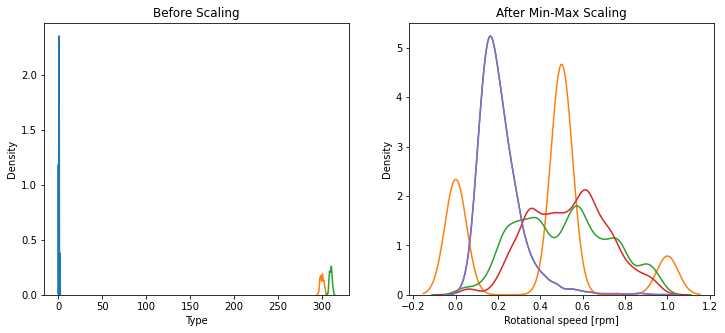

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))# Se crea una figura con dos gráficas en una misma página 


ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Type'], ax=ax1)
sns.kdeplot(X_train['Air temperature [K]'], ax=ax1)
sns.kdeplot(X_train['Process temperature [K]'], ax=ax1)
sns.kdeplot(X_train_scaled['Rotational speed [rpm]'], ax=ax2)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['Type'], ax=ax2)
sns.kdeplot(X_train_scaled['Air temperature [K]'], ax=ax2)
sns.kdeplot(X_train_scaled['Process temperature [K]'], ax=ax2)
sns.kdeplot(X_train_scaled['Rotational speed [rpm]'], ax=ax2)
plt.show()

## División del dataset en datos de entrenamiento y datos de test 

In [29]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#Visualizacion de los datos obtenidos
X_train.shape, X_test.shape

((7000, 7), (3000, 7))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)# Se separa el DataFrame en una parte para entrenar y otra para testear con una estrategia de evaluación planeada

## Modelamiento

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#Códo del modelo
# create Decision Tree classifier object
clf = DecisionTreeClassifier()
# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))# Muestra el porcentaje de acierto del modelo en la prueba de datos 

Accuracy: 0.9766666666666667


In [33]:
X_train.shape, X_test.shape# Muestra el número de filas y columnas de cada DataFrame en forma de tabla 

((7000, 7), (3000, 7))

## Evaluación del Modelo

El algoritmo tiene un un gran desempeño por sobre el 97%. Por ello, tiene la ventaja de tener menos hiperparámetros, por lo que es más simple de ajustar. En cuanto a Árboles de decisión es facil de utilizar, presentando un buen desempeño. A pesar de las diferentes caracteristicas que posee cada cada campo, el modelo mediante los datos que fueron utilizados para el entrenamiento, genera perfiles similares y trata de predecir con exactitud el Tipo de falla: Tipo de falla con las caracteristicas utilizadas para las pruebas.